In [1]:
#%matplotlib notebook
%matplotlib inline

import matplotlib

matplotlib.rcParams['figure.figsize'] = (12, 9)

import scipy
import scipy.stats
import math
import numpy as np
import pandas as pd

#import ipywidgets
#from ipywidgets import interact

#import sys
#sys.path.append("/Users/jdecock/git/pub/jdhp-sap/sap-cta-data-pipeline/utils/")
#import common_functions as common

/Users/jdecock/anaconda/envs/cta/lib/python3.5/site-packages/PIL/Image.py:85: RuntimeWarning: The _imaging extension was built for another  version of Pillow or PIL
  warnings.warn(str(v), RuntimeWarning)
/Users/jdecock/anaconda/envs/cta/lib/python3.5/site-packages/PIL/Image.py:85: RuntimeWarning: The _imaging extension was built for another  version of Pillow or PIL
  warnings.warn(str(v), RuntimeWarning)
/Users/jdecock/anaconda/envs/cta/lib/python3.5/site-packages/pytz/__init__.py:29: UserWarning: Module argparse was already imported from /Users/jdecock/anaconda/envs/cta/lib/python3.5/argparse.py, but /Users/jdecock/.local/lib/python3.5/site-packages/argparse-1.1-py3.5.egg is being added to sys.path
  from pkg_resources import resource_stream


## Delta psi

TC:               Id    hPsi_x    hPsi_y  peSum_x       peSum_y     delta
14      104303_1  2.199578  2.196622    372.0    298.639853  0.169342
73      182508_1 -2.117534 -2.117487    791.0    755.770836 -0.002729
75      183006_1  2.581056  2.582387    148.0    120.276403 -0.076218
113     230309_1 -2.648933 -2.651838    204.0    125.166386  0.166414
128     255806_1  2.026280  2.023427    193.0    143.865244  0.163481
137     266200_1 -1.568303 -1.569117    670.0    536.860192  0.046654
221     354007_1  1.054503  1.054978     94.0     53.092370 -0.027190
290     438601_1 -0.861708 -0.863268   1081.0    842.166415  0.089348
307     458108_1  1.923827  1.925145   1126.0   1001.026920 -0.075505
327     481302_1  3.050633  3.049189     84.0     55.219468  0.082729
342     487507_1 -1.844905 -1.844762    427.0    320.582455 -0.008223
415     131307_2  1.573624  1.574381    462.0    385.332634 -0.043360
422     132706_2  0.476571  0.479952    725.0    611.398632 -0.193736
434     155601_2

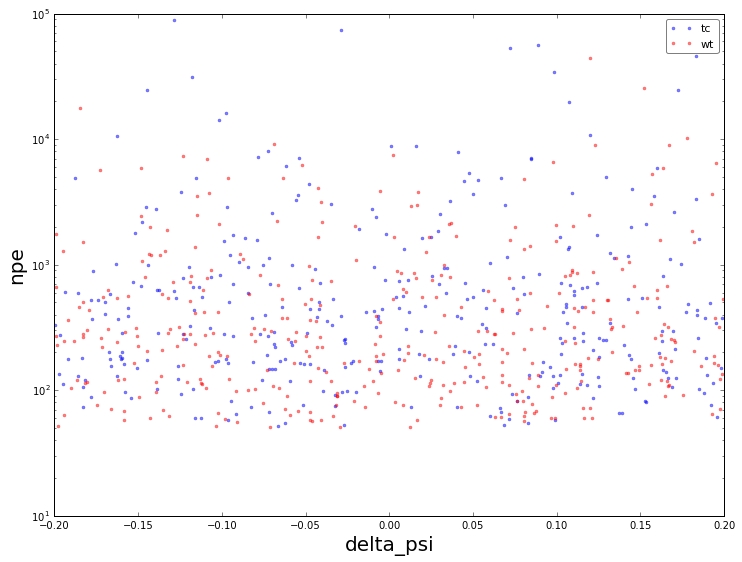

In [2]:
#CSV_FILE_PATH = "xps/2017_02_22/2017_02_20-22.csv"
#TAILCUT_LABEL = "Tailcut-5-10-kill"
#WAVELET_LABEL = "Wavelets-n4-K-k-C1-s3-m3-kill"
#WAVELET_LABEL = "WT-ref-f3-s3"
#WAVELET_LABEL = "WT-t24-f3-s3"
#WAVELET_LABEL = "WT-t28-f3-s3"

#CSV_FILE_PATH = "xps/2017_02_22_sapcta/2017_02_22_sapcta_best.csv"
#TAILCUT_LABEL = "Tailcut-5-10-kill"
#WAVELET_LABEL = "WT-t24-f3-s4"
#WAVELET_LABEL = "WT-t28-f3-s5"

#CSV_FILE_PATH = "xps/2017_02_22_sapcta/2017_02_22_sapcta_best2.csv"
#TAILCUT_LABEL = "Tailcut-5-10-kill"
#WAVELET_LABEL = "WT-ref-f3-s2-3-4-5"

CSV_FILE_PATH = "xps/2017_02_23_sapcta/2017_02_23_sapcta.csv"
TAILCUT_LABEL = "Tailcut-5-10-kill"
WAVELET_LABEL = "WT-ref-s2-2-3-3"
#WAVELET_LABEL = "WT-ref-s2-3-3-3"
#WAVELET_LABEL = "WT-ref-s3-2-2-2"

PART = 0         # 0 for gamma, 1 for protons
MIN_NPE_TC = 50  # cut on SUM_PE_CLEANED_IMAGE
MIN_NPE_WT = 50  # cut on SUM_PE_CLEANED_IMAGE
ANGLE = 0.2     # degrees

df = pd.read_csv(CSV_FILE_PATH)

ref = df[df.Type == 'Ref']
ref = ref[ref.Part == PART]

tc = df[df.Type == TAILCUT_LABEL]
tc = tc[tc.Part == PART]
tc = tc[tc.peSum >= MIN_NPE_TC]
#tc = tc[tc.border > 0]

wt = df[df.Type == WAVELET_LABEL]
wt = wt[wt.Part == PART]
wt = wt[wt.peSum >= MIN_NPE_WT]
#wt = wt[wt.border > 0]

# x=ref, y=clean
tc_psi = pd.merge(ref, tc, on="Id").loc[:,['Id','hPsi_x','hPsi_y','peSum_x','peSum_y']].dropna(how='any')
wt_psi = pd.merge(ref, wt, on="Id").loc[:,['Id','hPsi_x','hPsi_y','peSum_x','peSum_y']].dropna(how='any')
#np.abs(np.sin((tc_psi['hPsi_x'] - tc_psi['hPsi_y']).values)
#np.abs(np.sin((wt_psi['hPsi_x'] - wt_psi['hPsi_y']).values)

# x=ref, y=clean
tc_psi["delta"] = np.fmod(((tc_psi['hPsi_x'] - tc_psi['hPsi_y']) * 180. / np.pi), 90.)
wt_psi["delta"] = np.fmod(((wt_psi['hPsi_x'] - wt_psi['hPsi_y']) * 180. / np.pi), 90.)

tc_psi_nocut = tc_psi.copy()
wt_psi_nocut = wt_psi.copy()

tc_psi = tc_psi[abs(tc_psi.delta) <= ANGLE]
wt_psi = wt_psi[abs(wt_psi.delta) <= ANGLE]

print("TC:", tc_psi)
print("WT:", wt_psi)

# Print the ratio ####################

print("WT:", len(wt_psi))
print("TC:", len(tc_psi))
print("Ratio:", float(len(wt_psi)) / float(len(tc_psi)))

# Plot delta psi #####################

fig, ax = plt.subplots()

# x=ref, y=clean
ax.plot(tc_psi['delta'], tc_psi['peSum_y'], '.b', alpha=0.5, label="tc")
ax.plot(wt_psi['delta'], wt_psi['peSum_y'], '.r', alpha=0.5, label="wt")

ax.set_yscale('log')

ax.set_xlabel("delta_psi", fontsize=20)
ax.set_ylabel("npe", fontsize=20)

ax.legend(prop={'size': 11}, loc='best', fancybox=True, framealpha=0.5)

In [3]:
#df.groupby(["Type","Part","Success"]).count()  # Gammas + Protons
#df.groupby(["Type","Part"]).describe()         # Gammas + Protons
#df.columns

## Delta psi

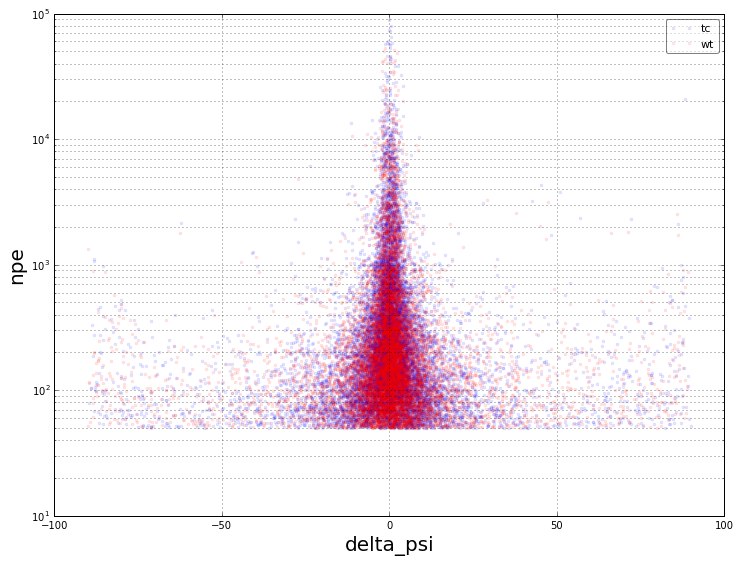

In [4]:
fig, ax = plt.subplots()

# x=ref, y=clean
ax.plot(tc_psi_nocut['delta'], tc_psi_nocut['peSum_y'], '.b', alpha=0.1, label="tc")
ax.plot(wt_psi_nocut['delta'], wt_psi_nocut['peSum_y'], '.r', alpha=0.1, label="wt")

ax.set_yscale('log')

ax.set_xlabel("delta_psi", fontsize=20)
ax.set_ylabel("npe", fontsize=20)

ax.legend(prop={'size': 11}, loc='best', fancybox=True, framealpha=0.5)
plt.grid(True, which='both', axis='both')

---

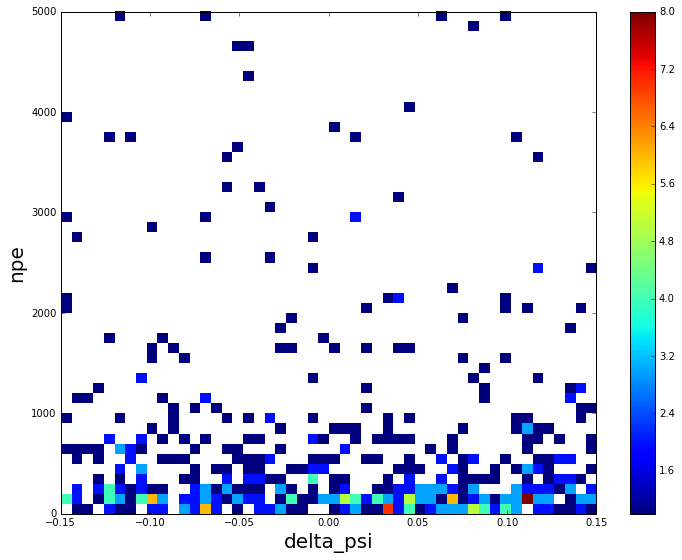

In [5]:
fig, ax = plt.subplots()

# x=ref, y=clean
H1, xedges1, yedges1, img1 = ax.hist2d(-np.abs(tc_psi_nocut['delta']), tc_psi_nocut['peSum_y'], bins=50, range=np.array([[-0.15,0.15], [0.,5000.]]), cmin=0.5, vmax=8., label="tc")
H2, xedges2, yedges2, img2 = ax.hist2d( np.abs(wt_psi_nocut['delta']), wt_psi_nocut['peSum_y'], bins=50, range=np.array([[-0.15,0.15], [0.,5000.]]), cmin=0.5, vmax=8., label="wt")

#ax.set_yscale('log')

ax.set_xlabel("delta_psi", fontsize=20)
ax.set_ylabel("npe", fontsize=20)

plt.colorbar(img1, ax=ax)

#plt.grid(True, which='both', axis='both')

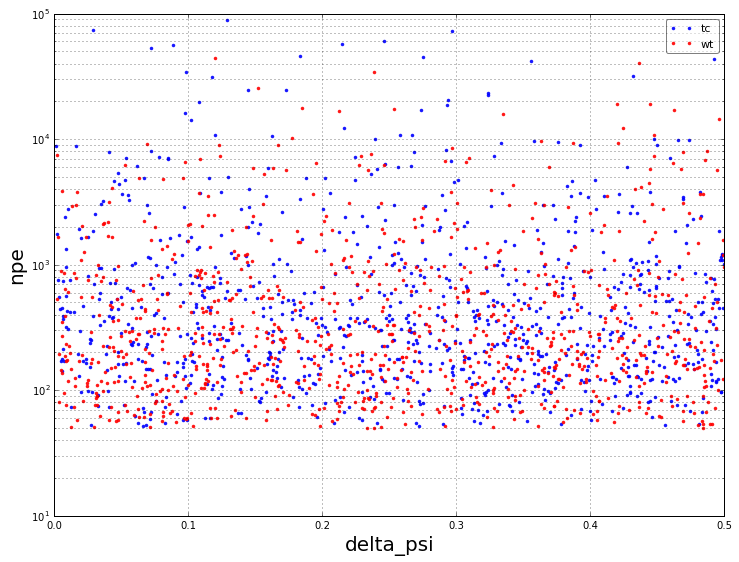

In [6]:
fig, ax = plt.subplots()

# x=ref, y=clean
ax.plot(np.abs(tc_psi_nocut['delta'][ np.abs(tc_psi_nocut.delta) < 0.5]), tc_psi_nocut[ np.abs(tc_psi_nocut.delta) < 0.5]['peSum_y'], '.b', alpha=0.9, label="tc")
ax.plot(np.abs(wt_psi_nocut['delta'][ np.abs(wt_psi_nocut.delta) < 0.5]), wt_psi_nocut[ np.abs(wt_psi_nocut.delta) < 0.5]['peSum_y'], '.r', alpha=0.9, label="wt")

ax.set_yscale('log')

ax.set_xlabel("delta_psi", fontsize=20)
ax.set_ylabel("npe", fontsize=20)

ax.legend(prop={'size': 11}, loc='best', fancybox=True, framealpha=0.5)
plt.grid(True, which='both', axis='both')

## Delta psi from script

Rem: this is a cross check, you can ignore it...

In [7]:
#%run ./utils/first_bin_ratio.py --angle=0.05 --min-npe=50 --metric hillas2_delta_psi_norm ./xps/2017_02_20/score_gamma_all_wavelets_mrfilter_kill.json  ./xps/2017_02_20/score_gamma_all_tailcut_kill.json